<a href="https://colab.research.google.com/github/ilsong/graduate/blob/master/graduate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt
import json
import io
import pickle
import networkx as nx
from matplotlib import font_manager as fm
from matplotlib import rc

In [0]:
# 구글 드라이브 인증 모듈
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# 데이터 로드
link, id = "https://drive.google.com/open?id=1YtILQy6sAl-fjNlqRUd_Fc-SYCF7z88Z".split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('parsedData0.bin')

# 글꼴 로드?
link, id = "https://drive.google.com/open?id=13NskuutOB4gmZnYuti0QCG9mNxOxHX2E".split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('GULIM.TTC')

font_name = fm.FontProperties(fname="GULIM.TTC").get_name()
rc('font', family=font_name)

In [0]:
# 여기는 내 드라이브에서 가져온 파일
id = []
id.append("https://drive.google.com/open?id=1cm_woglyYGlYyc-pNhZ25AdfgB_-bGmx".split('=')[1])
id.append("https://drive.google.com/open?id=1Z0mWhoKX85y9tf3Q5OydbiZCvtPMPHgb".split('=')[1])
id.append("https://drive.google.com/open?id=1pX3nAOJQkEFRid8g-68CdwfcjN7Nvae1".split('=')[1])
id.append("https://drive.google.com/open?id=1Q4YO36ORQR-lJz_TLOAHWSDPvGfrAa5e".split('=')[1])
id.append("https://drive.google.com/open?id=1JVk44M_yPlOigWnt5XGGakiTl2L1a3nK".split('=')[1])
id.append("https://drive.google.com/open?id=1iCPsc7VpH7n18AV0uaG9xt0jk5jl-LRL".split('=')[1])
id.append("https://drive.google.com/open?id=1us8vKG-J4KhvHAMGJAN2Po9UUI4Bc84m".split('=')[1])

for idx, _id in enumerate(id):
    downloaded = drive.CreateFile({'id': _id})
    downloaded.GetContentFile('parsedData'+str(idx)+'.bin')

downloaded = drive.CreateFile({'id': "https://drive.google.com/open?id=1MLsREIUpSV30Gutjt43St2OjRvkWTNxr".split('=')[1]})
downloaded.GetContentFile('data.json')

In [0]:
with open("data.json", "r", encoding='utf-8-sig') as datafile:
    cnt = 0
    for line in datafile:
        if cnt<10: print(line);
        cnt+=1

{"_id":{"$oid":"5d80fc45573052b67c25e953"},"title":"!","link":["#redirect 느낌표\n"]}

{"_id":{"$oid":"5d80fc45573052b67c25e954"},"title":"#","link":["","분류:특수 문자","분류:제목에 \\#가 들어간 문서","분류:링크 생성을 방해하는 문자","##","\\\\#","＃","닮은꼴 문자|모양이 비슷하다는 이유","井","올림표|샤프","♯","오타|오기","♭","조표(음악)","특수 문자","거짓짝|가짜 친구","A라고 쓰고 B라고 읽는다|A라고 쓰고 B라고 읽는","파운드","트위터","해시태그","은행","비밀번호","샤프","샵","혼성그룹","S\\#ARP","C\\#","F\\#","포스코건설","아파트","더샵","https://www.thesharp.co.kr/brand/bi_slogan.aspx|공식 사이트","보물","최인호","전각과 반각","나무위키","http://namu.wiki/w/%23|#","리그베다 위키","오위키","나무위키","http://namu.wiki/w/%23|문장 형식으로 링크를 거는 것을 권장하고 있다.","가독성","링크 모아쓰기","가독성","본말전도"]}

{"_id":{"$oid":"5d80fc45573052b67c25e955"},"title":"#FairyJoke #SDVX_Edit","link":["#redirect \\#FairyJoke\n"]}

{"_id":{"$oid":"5d80fc45573052b67c25e956"},"title":"#FairyJoke","link":["[include(틀:링크시 주의, 링크=","\\\\#FairyJoke","#Fairyjoke#","＃FairyJoke","동방 프로젝트","RoughSketch|uno(IOSYS)","#Fairy_dancing_in_lake#","동방홍마향","하우스(음악)|쥬크 하우스","풋워크","그루브 코스터","이오시스|

In [0]:
if (1 or 2 or 3) in [4,5,6]: print(1);

In [0]:
def parseLink(data):
    if "파일:" or  "분류:" or "http://" or "https://" in data:
        return

    return data.split("|")[0].replace("\\", "").replace("\\", "").split("#s-")[0].split("#S-")[0].strip()


def parseRawData():
    parsedData = {}
    print("Parse Raw Data Start...")
    with open("data.json", "r", encoding='utf-8-sig') as datafile:
        for line in datafile:
            temp = json.loads(line)
            parsedData[temp['title']] = list(filter(None, list(map(parseLink, temp['link'][1:]))))
            if '#redirect ' in temp['link'][0]:
                redirect = temp['link'][0].split("#redirect ")[1][:-1].split("#s-")[0].replace("\\", "").strip()
                parsedData[temp['title']].append(redirect)
    print("Parse Raw Data Done...")
    return parsedData


# Dict를 파일로 저장(pickle) size크기대로 잘라서 분할 저장함
# size=0 이면 하나의 파일로 저장
def saveDict(filename, _dict, size=100000):
    if not isinstance(filename, str):
        raise ValueError("file name is not string")
    elif not isinstance(_dict, dict):
        raise ValueError("dict is not type of dict")
    elif not isinstance(size, int):
        raise ValueError("size is not type of int")
    elif size < 0:
        raise ValueError("size must be more then 0")

    print("Save Parsed Data Start...")
    # size가 0보다 크면 size만큼 분할해서 저장하고 0이면 한번에 저장
    if size > 0:
        splited_dict = splitDict(_dict, size)
        for idx, e in enumerate(splited_dict):
            pickle.dump(e, open(filename + str(idx) + ".bin", "wb"))
    elif size == 0:
        pickle.dump(_dict, open(filename + ".bin", "wb"))

    print("Save Parsed Data Done...")


# "[filename][idx].bin" 파일(pickle)을 읽어서 메모리에 로드
# [idx]는 range(total)안에서 반복
def loadDict(filename, total):
    if not isinstance(filename, str):
        raise ValueError("file name is not string")
    elif not isinstance(total, int):
        raise ValueError("total count is not int")
    elif total < 0:
        raise ValueError("total count must be more than 0")

    print("Load Parsed Data Start...")
    data = {}
    if total > 0:
        for idx in range(total):
            data.update(pickle.load(open(filename + str(idx) + ".bin", "rb")))
    elif total == 0:
        data.update(pickle.load(open(filename + ".bin", "rb")))
    print("Load Parsed Data Done...")
    return data


# 엄청 큰 Dict를 size크기로 쪼개서 배열에 담음
def splitDict(_dict, size=100000):
    ret = []
    temp = {}
    for idx, key in enumerate(_dict.keys()):
        temp[key] = _dict[key]
        if idx > 0 and (idx % size) == 0:
            ret.append(temp)
            temp = {}
    ret.append(temp)
    return ret


# Link중에 문서에 없는애들 삭제 -> 완성됨
def removeDeadLinks(parsedData):
    print("Remove Dead Links Start...")
    dead = []
    for node in parsedData:
        temp = []
        for link in parsedData[node]:
            if link in parsedData:
                temp.append(link)
            else:
                dead.append(link)
        parsedData[node] = temp
    print("Remove Dead Links Done...")
    
    with open('dead.txt', 'w', encoding='utf-8-sig') as f:
        for d in dead:
            f.write(d+'\n')
        
    files.download('dead.txt')
    return parsedData


# 노드을 참조하는 부모 노드들을 dict로 리턴
# param: 전체 graph, data.keys()
def indegree_dict(graph, nodes):
    indegree_nodes = {key: [] for key in nodes}
    for node in nodes:
        for dst in graph[node]:
            indegree_nodes[dst].append(node)
    return indegree_nodes

  
# Dangling nodes를 리턴. key: 노드, value: weight
# param: 전체 graph, data.keys()
def dangling_nodes(graph, nodes):
    dangling_nodes_dict = {}
    for node in nodes:
        if len(graph[node]) == 0:
            dangling_nodes_dict[node] = 1
    return dangling_nodes_dict
  
  
# pagerank 리턴
# param: 전체 graph, data.keys()
def get_pagerank(graph, nodes):
    dangling = dangling_nodes(graph,nodes)
    return nx.pagerank(graph, dangling)
  

# 상위 노드, 본인, 하위 노드 및 edge로 구성된 subgraph를 리턴
# pagerank를 이용하여 상/하위 노드 각각 점수 상위 n개씩 그래프에 포함
# param: 전체 graph, 현재 node, 전체 indegree dict, 전체 pagerank, 개수 n
def get_subgraph(graph, cur_node, indegree, pagerank, n):
    pred = indegree[cur_node]
    succ = list(graph[cur_node])
    subgraph_nodes = []
    pr_local = {}
    for node in pred:
        pr_local[node] = pagerank[node]
    subgraph_nodes += sorted(pr_local.items(), reverse=True)[:n]
    
    pr_local.clear()
    for node in succ:
        pr_local[node] = pagerank[node]
    subgraph_nodes += sorted(pr_local.items(), reverse=True)[:n]
    subgraph_nodes = [item[0] for item in subgraph_nodes]
    subgraph_nodes += cur_node
    
    return graph.subgraph(subgraph_nodes)

# TODO: subgraph를 시각화 - 한글 폰트 문제 해결해야함 + cur_node는 표시를 다르게

In [0]:
# data파일에서 읽어오기
data = loadDict("parsedData", 7)

Load Parsed Data Start...
Load Parsed Data Done...


In [0]:
# Dead Link 제거
data = removeDeadLinks(data)

Remove Dead Links Start...
Remove Dead Links Done...


In [0]:
nx_digraph = nx.DiGraph()
nodes = data.keys()
nx_digraph.add_nodes_from(nodes)
for node in nodes:
    nx_digraph.add_edges_from([(node, dst) for dst in data[node]])

In [0]:
nodes

dict_keys(['DDS급 항공모함', 'DDT'])

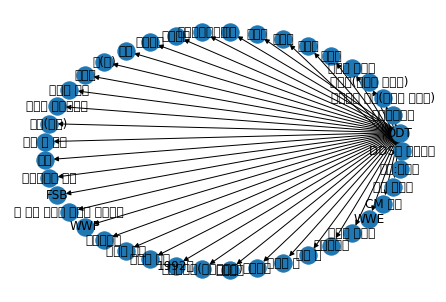

In [0]:
pos = nx.shell_layout(nx_digraph)
nx.draw_networkx_labels(nx_digraph, pos, font_family=font_name, font_size=10)
nx.draw_shell(nx_digraph)